In [1]:
# import package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# docker: /opt/nb/Desktop/...
# local: (copy file path and paste)
train = pd.read_csv('/Users/yi-chenlin/Desktop/Final project/Bearing/Datasets/bearings/NB.csv')
train['Fault'] = 0

test = pd.read_csv('/Users/yi-chenlin/Desktop/Final project/Bearing/Datasets/bearings/IR - 7.csv')
test['Fault'] = 1

dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


## Data understanding

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242310 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DE      242310 non-null  float64
 1   FE      242310 non-null  float64
 2   Fault   242310 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 MB


### Basic statistics

In [4]:
dataset.describe()

,DE,FE,Fault
count,242310.000000,242310.000000,242310.000000
mean,0.008163,0.033348,0.500000
std,0.216483,0.170863,0.500001
min,-1.425531,-0.895782,0.000000
25%,-0.065505,-0.041913,0.000000
50%,0.011474,0.031435,0.500000
75%,0.080317,0.107658,1.000000
max,1.639620,0.957213,1.000000


In [5]:
#dataset.describe().to_csv(r'/opt/nb/Desktop/Final project/statistics/bearing-statistics.csv', index = True)

### EDA

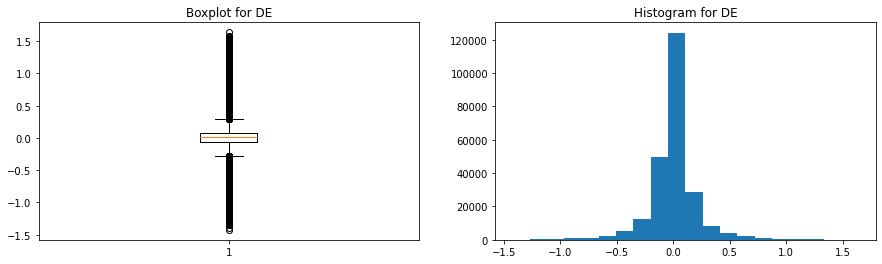

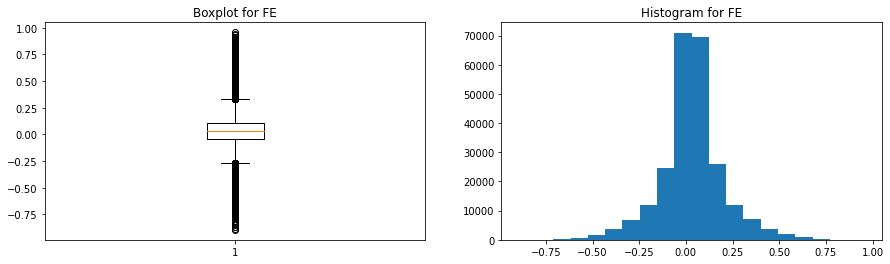

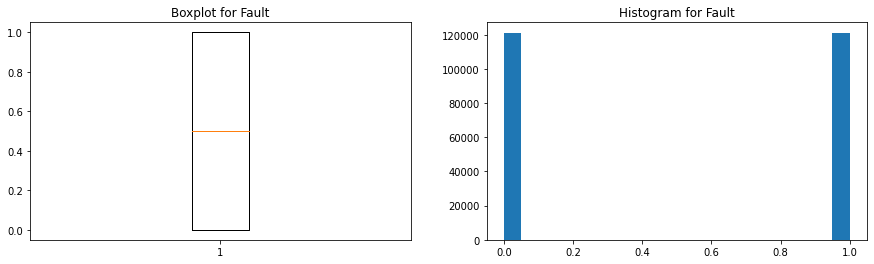

In [5]:
# Boxpot and histogram of each feature
for (columnName, columnData) in dataset.iteritems():
    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = columnData

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(columnName) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(columnName) )

    # Display
    plt.show()

### Null and duplicated value check

In [7]:
# Checking for null values
features = ['DE', 'FE', 'Fault']
N_null = sum(dataset[features].isnull().sum())
print("The dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 0 null values
The dataset contains 6941 duplicates


6941 duplicated values are dropped

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235369 entries, 0 to 235368
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DE      235369 non-null  float64
 1   FE      235369 non-null  float64
 2   Fault   235369 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 5.4 MB


### Correlation matrix and heatmap

In [9]:
dataset.corr()

,DE,FE,Fault
DE,1.000000,0.088877,-0.015778
FE,0.088877,1.000000,0.002574
Fault,-0.015778,0.002574,1.000000


In [15]:
#dataset.corr().to_csv(r'/opt/nb/Desktop/Final project/corr/bearing-corr.csv', index = True)

<AxesSubplot:>

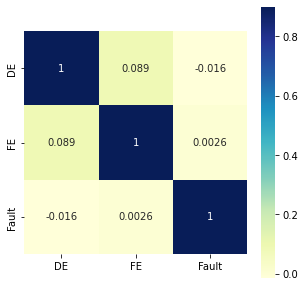

In [10]:
# make correlation matrix to heatmap
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dataset.corr(), cmap='YlGnBu', vmax = .9, square = True, annot=True)

In [15]:
def plot_feature(data, dataName):
    x = list(range(len(data.index)))
    y = data

    # plot the humidity data
    fig = plt.subplots(figsize=(18, 6))
    #fig = plt.figure()
    plt.plot(x,y)
    plt.ylabel(dataName)
    plt.xlabel('Index')

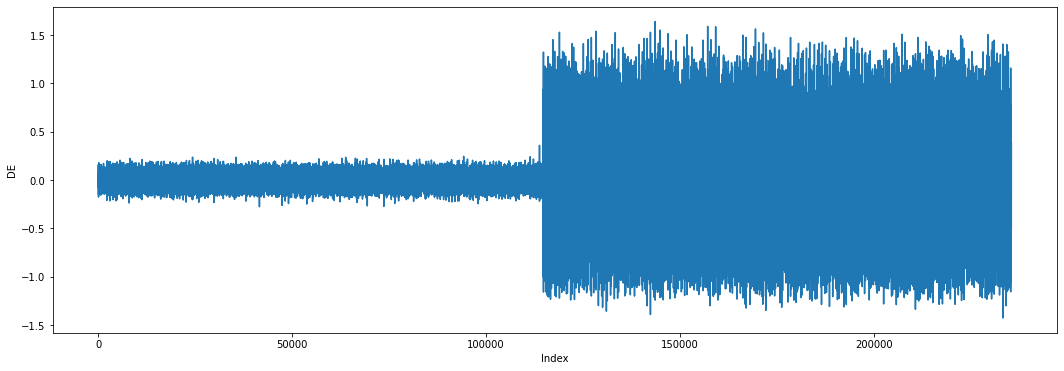

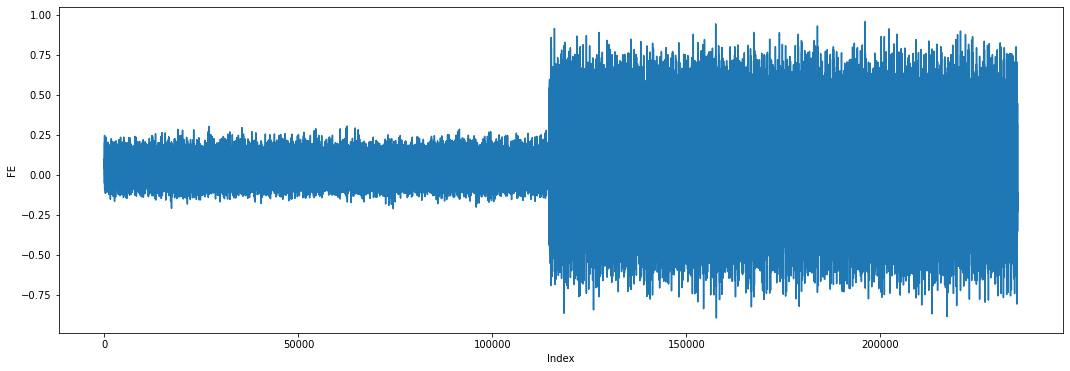

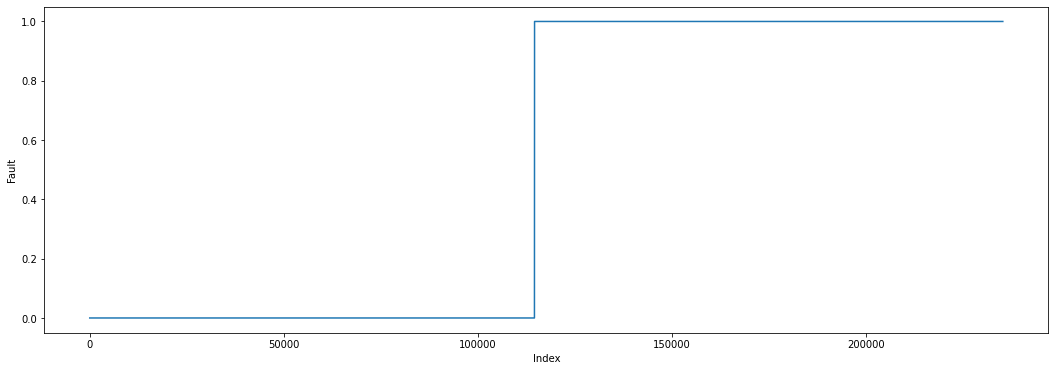

In [16]:
for (columnName, columnData) in dataset.iteritems():
    plot_feature(columnData, columnName)

## Data preparation

### Feature engineering

### Split data

In [5]:
#split the data into independent 'X' and dependent 'Y' variables
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [6]:
X

array([[ 0.06425354,  0.03862546],
       [ 0.06300185,  0.09676909],
       [-0.00438092,  0.12738182],
       ...,
       [ 0.39146866, -0.18100546],
       [ 0.18550092,  0.13601091],
       [-0.50257429, -0.11320545]])

In [7]:
y

0         0
1         0
2         0
3         0
4         0
         ..
235364    1
235365    1
235366    1
235367    1
235368    1
Name: Fault, Length: 235369, dtype: int64

In [8]:
#split the data set into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train

array([[ 0.12037108, -0.0226    ],
       [-0.10472492,  0.09450909],
       [-0.26444439,  0.42631818],
       ...,
       [-0.29514463,  0.11731455],
       [ 0.08782708,  0.0226    ],
       [-0.12751158,  0.25702364]])

In [10]:
y_train

8495      0
76670     0
166924    1
106561    0
140789    1
         ..
176963    1
117952    1
173685    1
43567     0
199340    1
Name: Fault, Length: 188295, dtype: int64

##### Save traing data and testing data to file for later use

In [60]:
dump(X_train, open("X_train.pkl", "wb"))
dump(y_train, open("y_train.pkl", "wb"))
dump(X_test, open("X_test.pkl", "wb"))
dump(y_test, open("y_test.pkl", "wb"))
#load_X_train = load(open('X_train.pkl', 'rb'))

#### Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

#### Save scaled training and testing data

In [61]:
dump(X_train_sc, open("X_train_sc.pkl", "wb"))
dump(X_test_sc, open("X_test_sc.pkl", "wb"))
dump(X_train_mm, open("X_train_mm.pkl", "wb"))
dump(X_test_mm, open("X_test_mm.pkl", "wb"))

In [33]:
X_train

array([[ 0.12037108, -0.0226    ],
       [-0.10472492,  0.09450909],
       [-0.26444439,  0.42631818],
       ...,
       [-0.29514463,  0.11731455],
       [ 0.08782708,  0.0226    ],
       [-0.12751158,  0.25702364]])

In [14]:
X_train_mm

array([[0.50434769, 0.47512577],
       [0.43091052, 0.53884852],
       [0.37880233, 0.71939631],
       ...,
       [0.36878643, 0.55125769],
       [0.49373027, 0.49972051],
       [0.42347642, 0.62727781]])

In [15]:
X_train_sc

array([[ 0.51332574, -0.32174785],
       [-0.51305407,  0.35472713],
       [-1.24133372,  2.27140625],
       ...,
       [-1.38131891,  0.48646173],
       [ 0.36493347, -0.06065224],
       [-0.61695535,  1.29348452]])

## Modeling

In [16]:
def train_models(X_train, y_train):
  #use logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)

  #use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, y_train)

  #use SVC (liner kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)

  #print the tranning accurancy of each model
  print('[0]Logistic Regression Tranning Accurancy: ', log.score(X_train, y_train))
  print('[1]KNeighbors Tranning Accurancy: ', knn.score(X_train, y_train))
  print('[2]SVC (liner kernel) Tranning Accurancy: ', svc_lin.score(X_train, y_train))
  print('[3]SVC (RBF kernel) Tranning Accurancy: ', svc_rbf.score(X_train, y_train))
  print('[4]GaussianNB Tranning Accurancy: ', gauss.score(X_train, y_train))
  print('[5]Decision Tree Tranning Accurancy: ', tree.score(X_train, y_train))
  print('[6]RandomForestClassifier Tranning Accurancy: ', forest.score(X_train, y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

### Try with standard scaled training data first

In [17]:
models_sc = train_models(X_train_sc, y_train)

[0]Logistic Regression Tranning Accurancy:  0.4665763828035795
[1]KNeighbors Tranning Accurancy:  0.8840171008258318
[2]SVC (liner kernel) Tranning Accurancy:  0.5133859104065429
[3]SVC (RBF kernel) Tranning Accurancy:  0.8637297857085956
[4]GaussianNB Tranning Accurancy:  0.8606335802862529
[5]Decision Tree Tranning Accurancy:  0.9999787567380971
[6]RandomForestClassifier Tranning Accurancy:  0.9836479991502696


In [66]:
from pickle import dump
for i in range(len(models_sc)):
    # save model
    fileName = '/Users/yi-chenlin/Desktop/Final project/pickle/models/bearing_classifiers/standard_scaled/' + str(models_sc[i].__class__.__name__) + '.pkl'
    dump(models_sc[i], open(fileName, 'wb'))

In [55]:
from pickle import load
load_model_DecisionTreeClassifier = load(open('DecisionTreeClassifier.pkl', 'rb'))

In [65]:
models_sc[0]

'LogisticRegression'

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
def print_scores(y, y_pred, model):
    print(
        'Accuracy score: {:.02%}, Precision: {:.02%}, Recall: {:.02%}, F1 score: {:.02%} '.format(
            accuracy_score(y, y_pred),
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            f1_score(y, y_pred, pos_label=1)
        ), model
    )

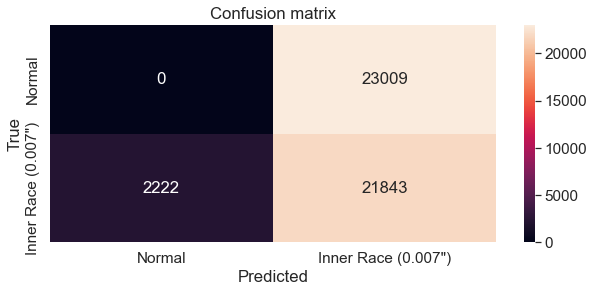

Accuracy score: 46.40%, Precision: 48.70%, Recall: 90.77%, F1 score: 63.39%  LogisticRegression(random_state=0)


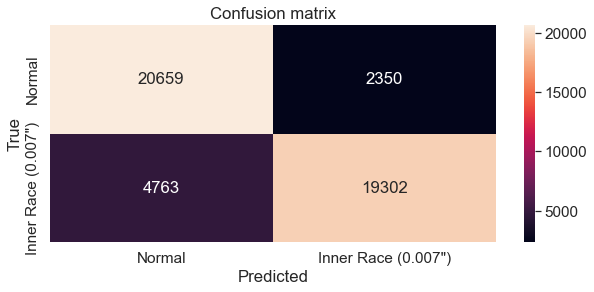

Accuracy score: 84.89%, Precision: 89.15%, Recall: 80.21%, F1 score: 84.44%  KNeighborsClassifier()


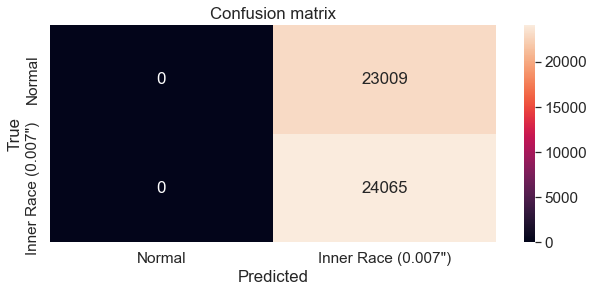

Accuracy score: 51.12%, Precision: 51.12%, Recall: 100.00%, F1 score: 67.66%  SVC(kernel='linear', random_state=0)


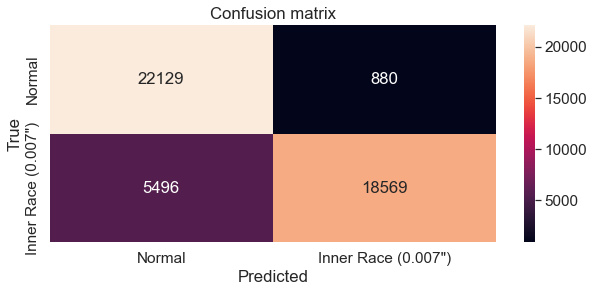

Accuracy score: 86.46%, Precision: 95.48%, Recall: 77.16%, F1 score: 85.35%  SVC(random_state=0)


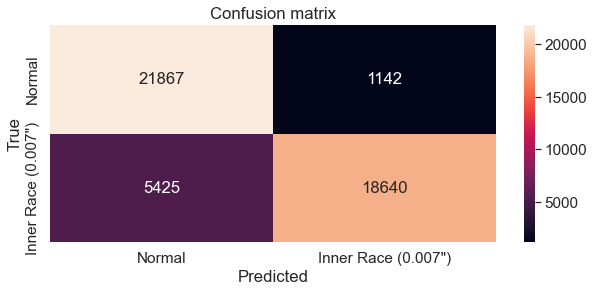

Accuracy score: 86.05%, Precision: 94.23%, Recall: 77.46%, F1 score: 85.02%  GaussianNB()


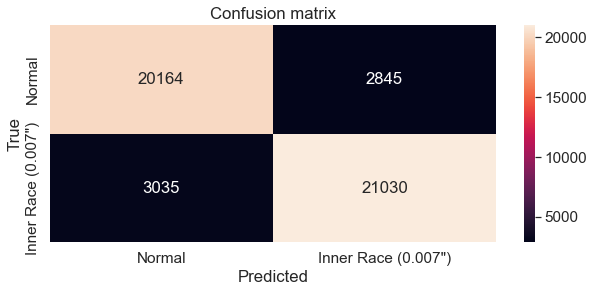

Accuracy score: 87.51%, Precision: 88.08%, Recall: 87.39%, F1 score: 87.73%  DecisionTreeClassifier(criterion='entropy', random_state=0)


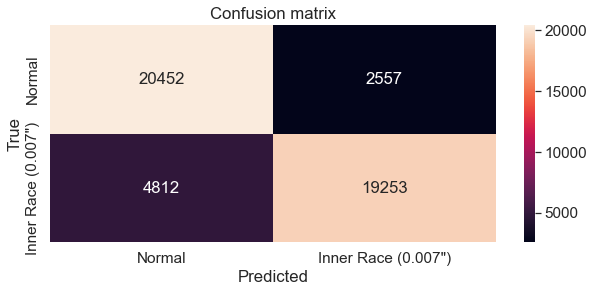

Accuracy score: 84.35%, Precision: 88.28%, Recall: 80.00%, F1 score: 83.94%  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


In [23]:
for i in range(len(models_sc)):
  y_pred = models_sc[i].predict(X_test_sc)
  cm = confusion_matrix(y_test, y_pred)
  index = ['Normal','Inner Race (0.007")']  
  columns = ['Normal','Inner Race (0.007")']  
  cm_df = pd.DataFrame(cm,columns,index)  


  plt.figure(figsize=(10,4))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(cm_df, annot=True, fmt='g') # font size
  plt.title('Confusion matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print_scores(y_test, y_pred, models_sc[i])

### Try classification with MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [25]:
X_train_mm

array([[0.50434769, 0.47512577],
       [0.43091052, 0.53884852],
       [0.37880233, 0.71939631],
       ...,
       [0.36878643, 0.55125769],
       [0.49373027, 0.49972051],
       [0.42347642, 0.62727781]])

In [26]:
X_train

array([[ 0.12037108, -0.0226    ],
       [-0.10472492,  0.09450909],
       [-0.26444439,  0.42631818],
       ...,
       [-0.29514463,  0.11731455],
       [ 0.08782708,  0.0226    ],
       [-0.12751158,  0.25702364]])

In [27]:
min_max_scaled_models = train_models(X_train_mm, y_train)

[0]Logistic Regression Tranning Accurancy:  0.4669693831487825
[1]KNeighbors Tranning Accurancy:  0.8842985740460447
[2]SVC (liner kernel) Tranning Accurancy:  0.5133859104065429
[3]SVC (RBF kernel) Tranning Accurancy:  0.8625401630420351
[4]GaussianNB Tranning Accurancy:  0.8606335802862529
[5]Decision Tree Tranning Accurancy:  0.9999681351071457
[6]RandomForestClassifier Tranning Accurancy:  0.983807323614541


In [68]:
for i in range(len(min_max_scaled_models)):
    # save model
    fileName = '/Users/yi-chenlin/Desktop/Final project/pickle/models/bearing_classifiers/min_max_scaled/' + str(models_sc[i].__class__.__name__) + '.pkl'
    dump(min_max_scaled_models[i], open(fileName, 'wb'))

In [69]:
load_model_DecisionTreeClassifier_mm = load(open('/Users/yi-chenlin/Desktop/Final project/pickle/models/bearing_classifiers/min_max_scaled/DecisionTreeClassifier.pkl', 'rb'))
print_scores(y_test, load_model_DecisionTreeClassifier_mm.predict(X_test_mm), load_model_DecisionTreeClassifier_mm)

Accuracy score: 87.45%, Precision: 88.03%, Recall: 87.33%, F1 score: 87.68%  DecisionTreeClassifier(criterion='entropy', random_state=0)


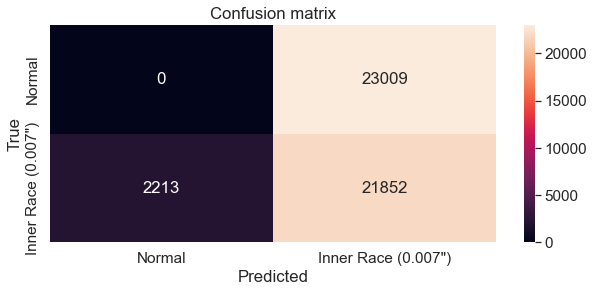

Accuracy score: 46.42%, Precision: 48.71%, Recall: 90.80%, F1 score: 63.41%  LogisticRegression(random_state=0)


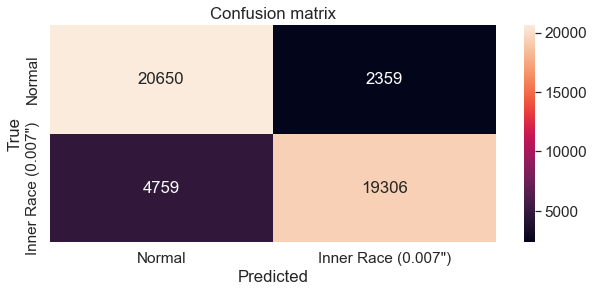

Accuracy score: 84.88%, Precision: 89.11%, Recall: 80.22%, F1 score: 84.43%  KNeighborsClassifier()


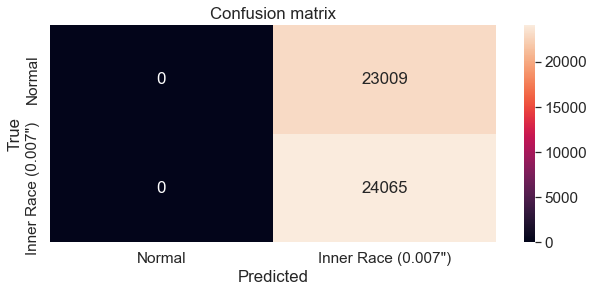

Accuracy score: 51.12%, Precision: 51.12%, Recall: 100.00%, F1 score: 67.66%  SVC(kernel='linear', random_state=0)


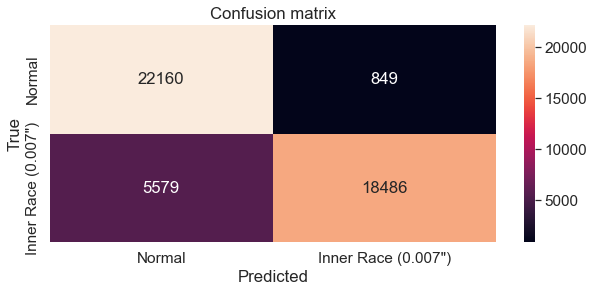

Accuracy score: 86.34%, Precision: 95.61%, Recall: 76.82%, F1 score: 85.19%  SVC(random_state=0)


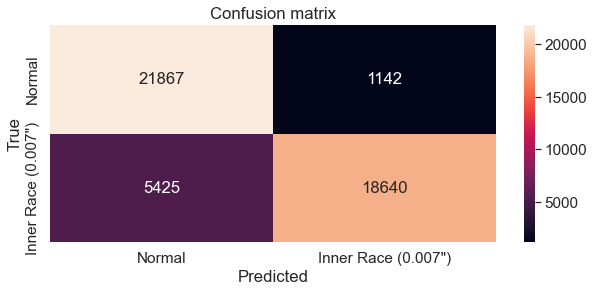

Accuracy score: 86.05%, Precision: 94.23%, Recall: 77.46%, F1 score: 85.02%  GaussianNB()


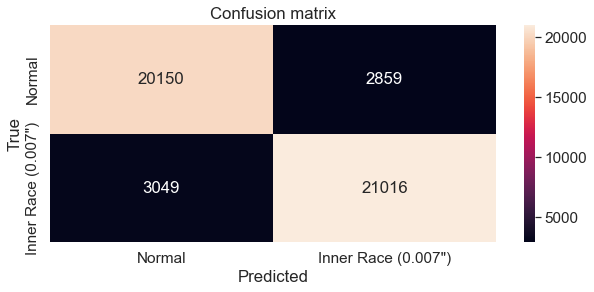

Accuracy score: 87.45%, Precision: 88.03%, Recall: 87.33%, F1 score: 87.68%  DecisionTreeClassifier(criterion='entropy', random_state=0)


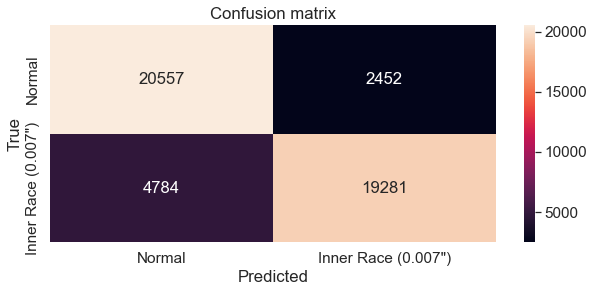

Accuracy score: 84.63%, Precision: 88.72%, Recall: 80.12%, F1 score: 84.20%  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


In [29]:
for i in range(len(min_max_scaled_models)):
  y_pred = min_max_scaled_models[i].predict(X_test_mm)
  cm = confusion_matrix(y_test, y_pred)
  index = ['Normal','Inner Race (0.007")']  
  columns = ['Normal','Inner Race (0.007")']  
  cm_df = pd.DataFrame(cm,columns,index)  


  plt.figure(figsize=(10,4))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(cm_df, annot=True, fmt='g') # font size
  plt.title('Confusion matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  print_scores(y_test, y_pred, min_max_scaled_models[i])


In [30]:
X_train

array([[ 0.12037108, -0.0226    ],
       [-0.10472492,  0.09450909],
       [-0.26444439,  0.42631818],
       ...,
       [-0.29514463,  0.11731455],
       [ 0.08782708,  0.0226    ],
       [-0.12751158,  0.25702364]])

### TPOT

In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X_train, y_train)
# export the best model
model.export('bearing_classification_tpot_best_model.py')

                                                                                   
Generation 1 - Current best internal CV score: 0.8995229078175992
                                                                                   
Generation 2 - Current best internal CV score: 0.8995229078175992
                                                                                  
Generation 3 - Current best internal CV score: 0.8995229078175992
                                                                                  
Generation 4 - Current best internal CV score: 0.9757667422450844
                                                             
Generation 5 - Current best internal CV score: 0.9868663499817293
                                                             
Best pipeline: ExtraTreesClassifier(SelectPercentile(MinMaxScaler(input_matrix), percentile=31), bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=8, min_samples_split=16, n_es

In [75]:
model.export('/Users/yi-chenlin/Desktop/Final project/TPOT/bearing_classifiers/bearing_classification_tpot_best_model.py')

In [34]:
model.score(X_train, y_train)

0.9905786133460793

the following matrix should be re-made since the scores are not corrrect

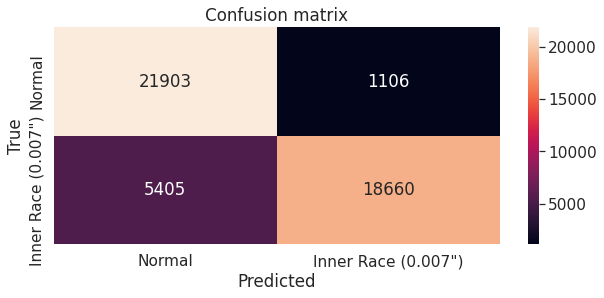

Accuracy score: 86.17%, Precision: 77.54%, Recall: 94.40%, F1 score: 85.15%  AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=120)


In [35]:
y_pred_tpot = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_tpot)
index = ['Normal','Inner Race (0.007")']  
columns = ['Normal','Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print_scores(y_pred_tpot, y_test, model)

In [36]:
model.score(X_test, y_test)

0.9886136720907507

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_tpot, target_names=['Normal','Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       1.00      0.98      0.99     23009
Inner Race (0.007")       0.98      1.00      0.99     24065

           accuracy                           0.99     47074
          macro avg       0.99      0.99      0.99     47074
       weighted avg       0.99      0.99      0.99     47074



## Amplo AutoML

In [2]:
from Amplo import Pipeline
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from pickle import load

In [3]:
# load data
X_train = load(open('/opt/nb/Desktop/Final project/pickle/dataset/X_train.pkl', 'rb'))
y_train = load(open('/opt/nb/Desktop/Final project/pickle/dataset/y_train.pkl', 'rb'))

In [5]:
X_test = load(open('/opt/nb/Desktop/Final project/pickle/dataset/X_test.pkl', 'rb'))
y_test = load(open('/opt/nb/Desktop/Final project/pickle/dataset/y_test.pkl', 'rb'))

In [14]:
train = pd.read_csv('/opt/nb/Desktop/Final project/Bearing/Datasets/bearings/NB.csv')
train['Fault'] = 0

test = pd.read_csv('/opt/nb/Desktop/Final project/Bearing/Datasets/bearings/IR - 7.csv')
test['Fault'] = 1

dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [15]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]



*** Starting Amplo AutoML - AutoML ***


[AutoML] Data Balancer: Found class balance: 50.0%, 50.0%.
[AutoML] No balancing needed :)
[AutoML] Starting Feature Processor
[AutoML] Analysing co-linearity
[AutoML] Removed 1 Co-Linear features (0.999 %% threshold)
[AutoML] Analysing datetime features
[AutoML] Added 0 datetime features
[AutoML] Analysing cross features


100% 19/19 [00:03<00:00,  6.31it/s]


[AutoML] Added 0 cross features
[AutoML] Calculating and Analysing K-Means features


100% 16/16 [00:00<00:00, 167.52it/s]


[AutoML] Analysing Trigonometric Features


100% 19/19 [00:00<00:00, 83.35it/s]


[AutoML] Added 0 trigonometric features
[AutoML] Analysing Inverse Features
[AutoML] Added 0 inverse features.
[AutoML] Diff features skipped, max diff = 0
[AutoML] Added 0 differenced features
[AutoML] Lagged features skipped, max lags = 0
[AutoML] Added 0 lagged features
[AutoML] Analysing features with a Random Forest
[AutoML] Selected 10 features with 85.0% RF threshold
[AutoML] Selected 20 features with 0.5% RF increment
[AutoML] Analysing features with Shapely Additive Explanations
[AutoML] Selected 6 features with 85.0% Shap threshold
[AutoML] Selected 4 features with 5.0% Shap increment
[AutoML] Initial Modelling for RFT features (10)
[AutoML] Splitting data (shuffle=True, splits=3, features=10)
[AutoML] BaggingClassifier              neg_log_loss: -1.1086         ± 0.7957         , training time: 0.1 s
[AutoML] XGBClassifier                  neg_log_loss: -0.2478         ± 0.0579         , training time: 0.4 s
[AutoML] CatBoostClassifier             neg_log_loss: -0.2840      

[I 2022-01-10 13:41:19,059] A new study created in memory with name: no-name-7e16f80a-1ede-4597-a2db-df95ed28b510


[AutoML] RandomForestClassifier         neg_log_loss: -0.8368         ± 0.5098         , training time: 0.5 s

[AutoML] Starting Hyper Parameter Optimization for RandomForestClassifier on RFT features (100 samples, 10 features)


[I 2022-01-10 13:41:51,176] Trial 0 finished with value: -0.2190515910863618 and parameters: {'n_estimators': 749, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 15, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: -0.2190515910863618.
[I 2022-01-10 13:42:35,545] Trial 1 finished with value: -0.3187746735816631 and parameters: {'n_estimators': 931, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 46, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 0 with value: -0.2190515910863618.
[I 2022-01-10 13:42:42,400] Trial 2 finished with value: -0.22574053819964104 and parameters: {'n_estimators': 137, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 12, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: -0.2190515910863618.
[I 2022-01-10 13:43:05,332] Trial 3 finished with value: -0.2540695779359047 and parameters: {'n_estimators': 549

[AutoML] Creating Documentation for RandomForestClassifier - RFT
[AutoML] Accuracy:        95.00 ± 6.71 %
[AutoML] Precision:       95.48 ± 9.43 %
[AutoML] Sensitivity:     96.00 ± 8.00 %
[AutoML] Specificity:     94.00 ± 12.81 %
[AutoML] F1-score:        95.20 ± 6.14 %
[AutoML] Confusion Matrix:
[AutoML] Prediction / true |     Faulty     |    Healthy      
[AutoML]       Faulty      | 48.0 ± 4.0 %   |  3.0 ± 6.4 %   
[AutoML]       Healthy     | 2.0 ± 4.0 %    |  47.0 ± 6.4 %  


This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
[I 2022-01-10 14:43:04,906] A new study created in memory with name: no-name-18b44285-b21e-41ad-9013-4cf74999c834



[AutoML] Starting Hyper Parameter Optimization for RandomForestClassifier on ShapThreshold features (100 samples, 6 features)


[I 2022-01-10 14:43:34,559] Trial 0 finished with value: -0.21819734847232325 and parameters: {'n_estimators': 749, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 15, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: -0.21819734847232325.
[I 2022-01-10 14:44:18,723] Trial 1 finished with value: -0.293387668136701 and parameters: {'n_estimators': 931, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 46, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 0 with value: -0.21819734847232325.
[I 2022-01-10 14:44:25,583] Trial 2 finished with value: -0.21534130560332615 and parameters: {'n_estimators': 137, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 12, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 2 with value: -0.21534130560332615.
[I 2022-01-10 14:44:47,304] Trial 3 finished with value: -0.2459678395567349 and parameters: {'n_estimators': 

[AutoML] Creating Documentation for RandomForestClassifier - ShapThreshold
[AutoML] Accuracy:        95.00 ± 6.71 %
[AutoML] Precision:       95.00 ± 7.64 %
[AutoML] Sensitivity:     96.00 ± 12.00 %
[AutoML] Specificity:     94.00 ± 9.17 %
[AutoML] F1-score:        94.77 ± 7.74 %
[AutoML] Confusion Matrix:
[AutoML] Prediction / true |     Faulty     |    Healthy      
[AutoML]       Faulty      | 48.0 ± 6.0 %   |  3.0 ± 4.6 %   
[AutoML]       Healthy     | 2.0 ± 6.0 %    |  47.0 ± 4.6 %  


[I 2022-01-10 15:44:32,580] A new study created in memory with name: no-name-b7e7a56a-1105-470f-a680-3d1fa97a07bd



[AutoML] Starting Hyper Parameter Optimization for XGBClassifier on RFT features (100 samples, 10 features)


The reported value is ignored because this `step` 0 is already reported.
The reported value is ignored because this `step` 1 is already reported.
The reported value is ignored because this `step` 2 is already reported.
The reported value is ignored because this `step` 3 is already reported.
The reported value is ignored because this `step` 4 is already reported.
The reported value is ignored because this `step` 5 is already reported.
The reported value is ignored because this `step` 6 is already reported.
The reported value is ignored because this `step` 7 is already reported.
The reported value is ignored because this `step` 8 is already reported.
The reported value is ignored because this `step` 9 is already reported.
The reported value is ignored because this `step` 0 is already reported.
The reported value is ignored because this `step` 1 is already reported.
The reported value is ignored because this `step` 2 is already reported.
The reported value is ignored because this `step` 3

[AutoML] Creating Documentation for XGBClassifier - RFT
[AutoML] Accuracy:        95.00 ± 5.00 %
[AutoML] Precision:       95.00 ± 7.64 %
[AutoML] Sensitivity:     96.00 ± 8.00 %
[AutoML] Specificity:     94.00 ± 9.17 %
[AutoML] F1-score:        95.05 ± 5.00 %
[AutoML] Confusion Matrix:
[AutoML] Prediction / true |     Faulty     |    Healthy      
[AutoML]       Faulty      | 48.0 ± 4.0 %   |  3.0 ± 4.6 %   
[AutoML]       Healthy     | 2.0 ± 4.0 %    |  47.0 ± 4.6 %  
[AutoML] All done :)


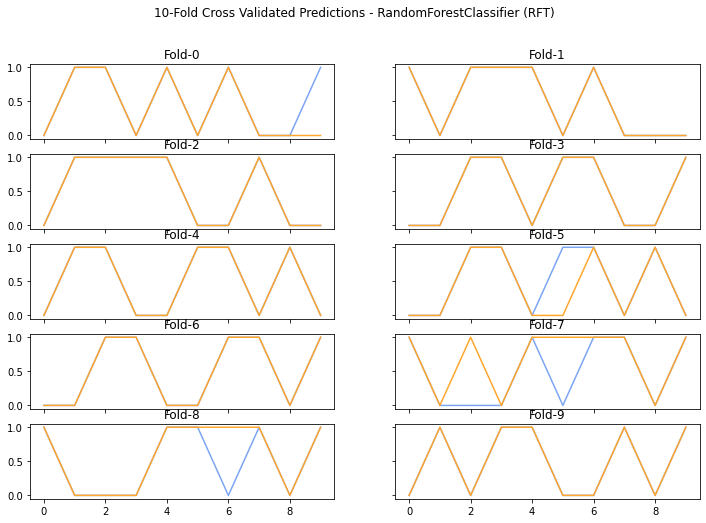

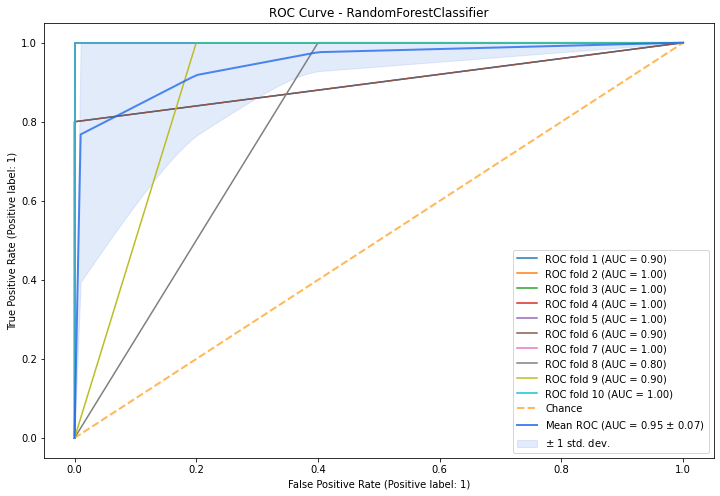

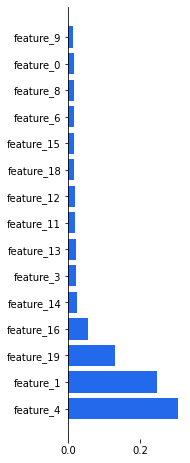

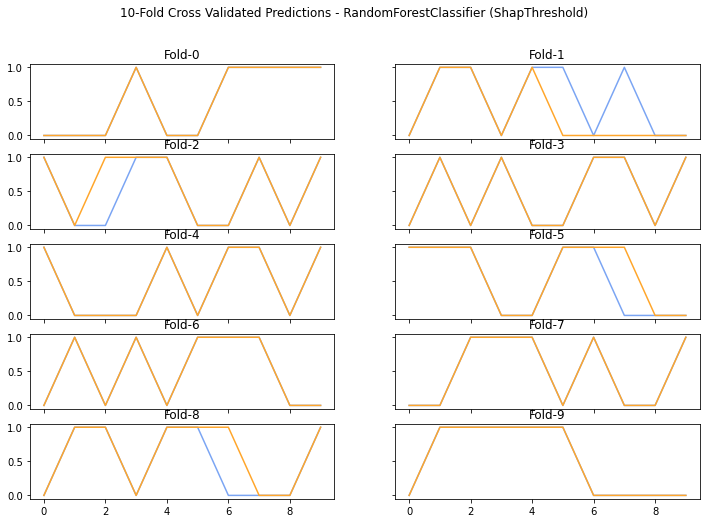

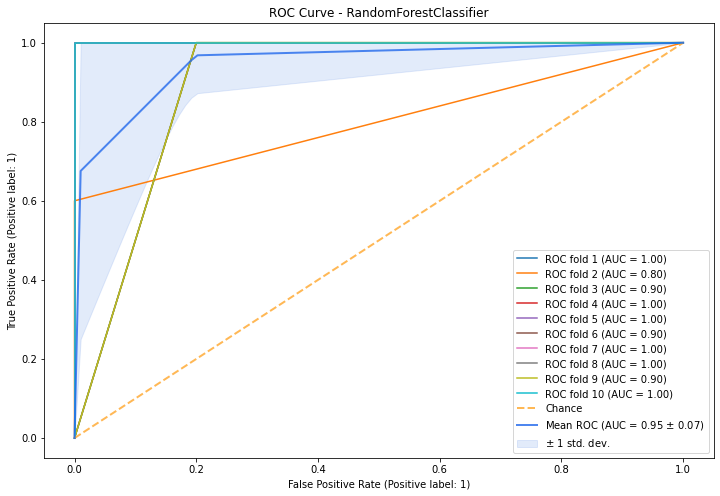

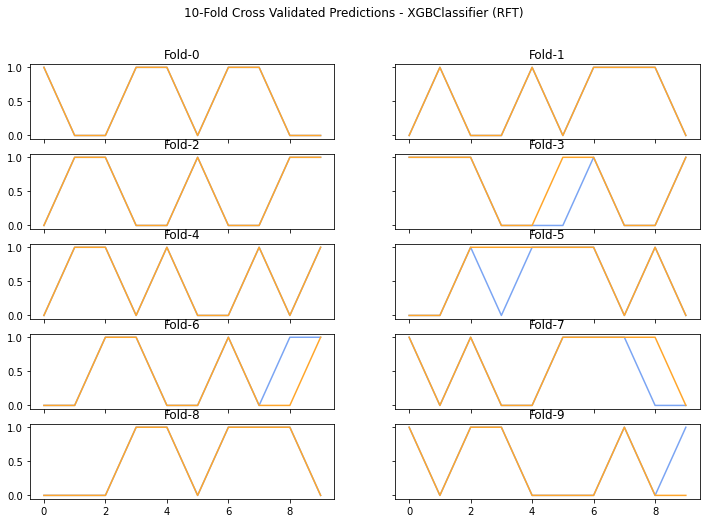

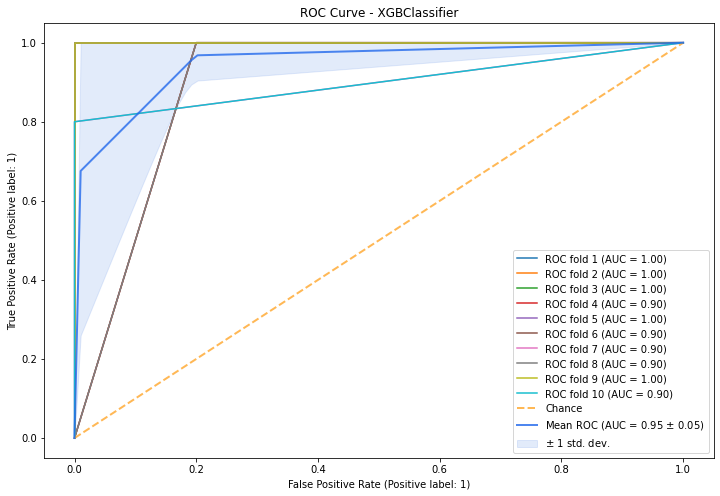

In [16]:
X, y = make_classification()
pipeline = Pipeline()
pipeline.fit(X, y)

In [17]:
y_pred_amplo = pipeline.predict_proba(X)

[AutoML] Added 0 additive features
[AutoML] Added 0 cross features
[AutoML] Added 0 datetime features
[AutoML] Added 0 differenced features
[AutoML] Added 0 lagged features
[AutoML] Added 0 trigonometric features
[AutoML] Added 0 inverse features.


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred_amplo)
index = ['Normal','Inner Race (0.007")']  
columns = ['Normal','Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print_scores(y_pred_amplo, y_pred, model)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

## Auto-sklearn

In [19]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.14.3


In [22]:
X_train = load(open('/opt/nb/Desktop/Final project/pickle/dataset/bearing/X_train.pkl', 'rb'))
y_train = load(open('/opt/nb/Desktop/Final project/pickle/dataset/bearing/y_train.pkl', 'rb'))
X_test = load(open('/opt/nb/Desktop/Final project/pickle/dataset/bearing/X_test.pkl', 'rb'))
y_test = load(open('/opt/nb/Desktop/Final project/pickle/dataset/bearing/y_test.pkl', 'rb'))

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier

# define search
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: c1260c2e-7233-11ec-8017-2b1e07b851f2
  Metric: accuracy
  Best validation score: 0.863594
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 4
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 21
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 0.862


In [24]:
print(model)

AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=120)


In [27]:
from pickle import dump
dump(model, open('/opt/nb/Desktop/Final project/pickle/models/bearing_classifiers/autoML/auto_sklearn.pkl', 'wb'))

In [30]:
load_auto_sklearn = load(open('/opt/nb/Desktop/Final project/pickle/models/bearing_classifiers/autoML/auto_sklearn.pkl', 'rb'))

In [31]:
y_hat = load_auto_sklearn.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

Accuracy: 0.862


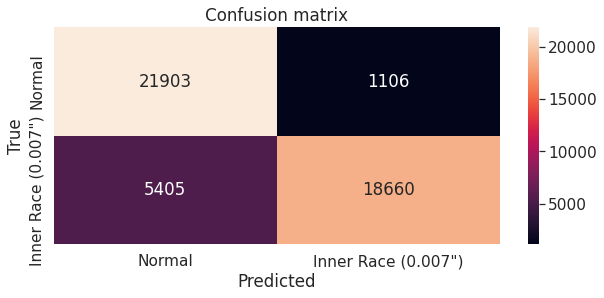

Accuracy score: 86.17%, Precision: 94.40%, Recall: 77.54%, F1 score: 85.15%  AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=120)


In [36]:
cm = confusion_matrix(y_test, y_hat)
index = ['Normal','Inner Race (0.007")']  
columns = ['Normal','Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print_scores(y_test, y_hat, load_auto_sklearn)